In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from impyute.imputation.cs import mice
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [57]:
#pip install impyute

In [63]:
data = pd.read_csv('/train (1).csv')
df = data.copy()
test = pd.read_csv('/test.csv')

In [64]:
df.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

<Axes: >

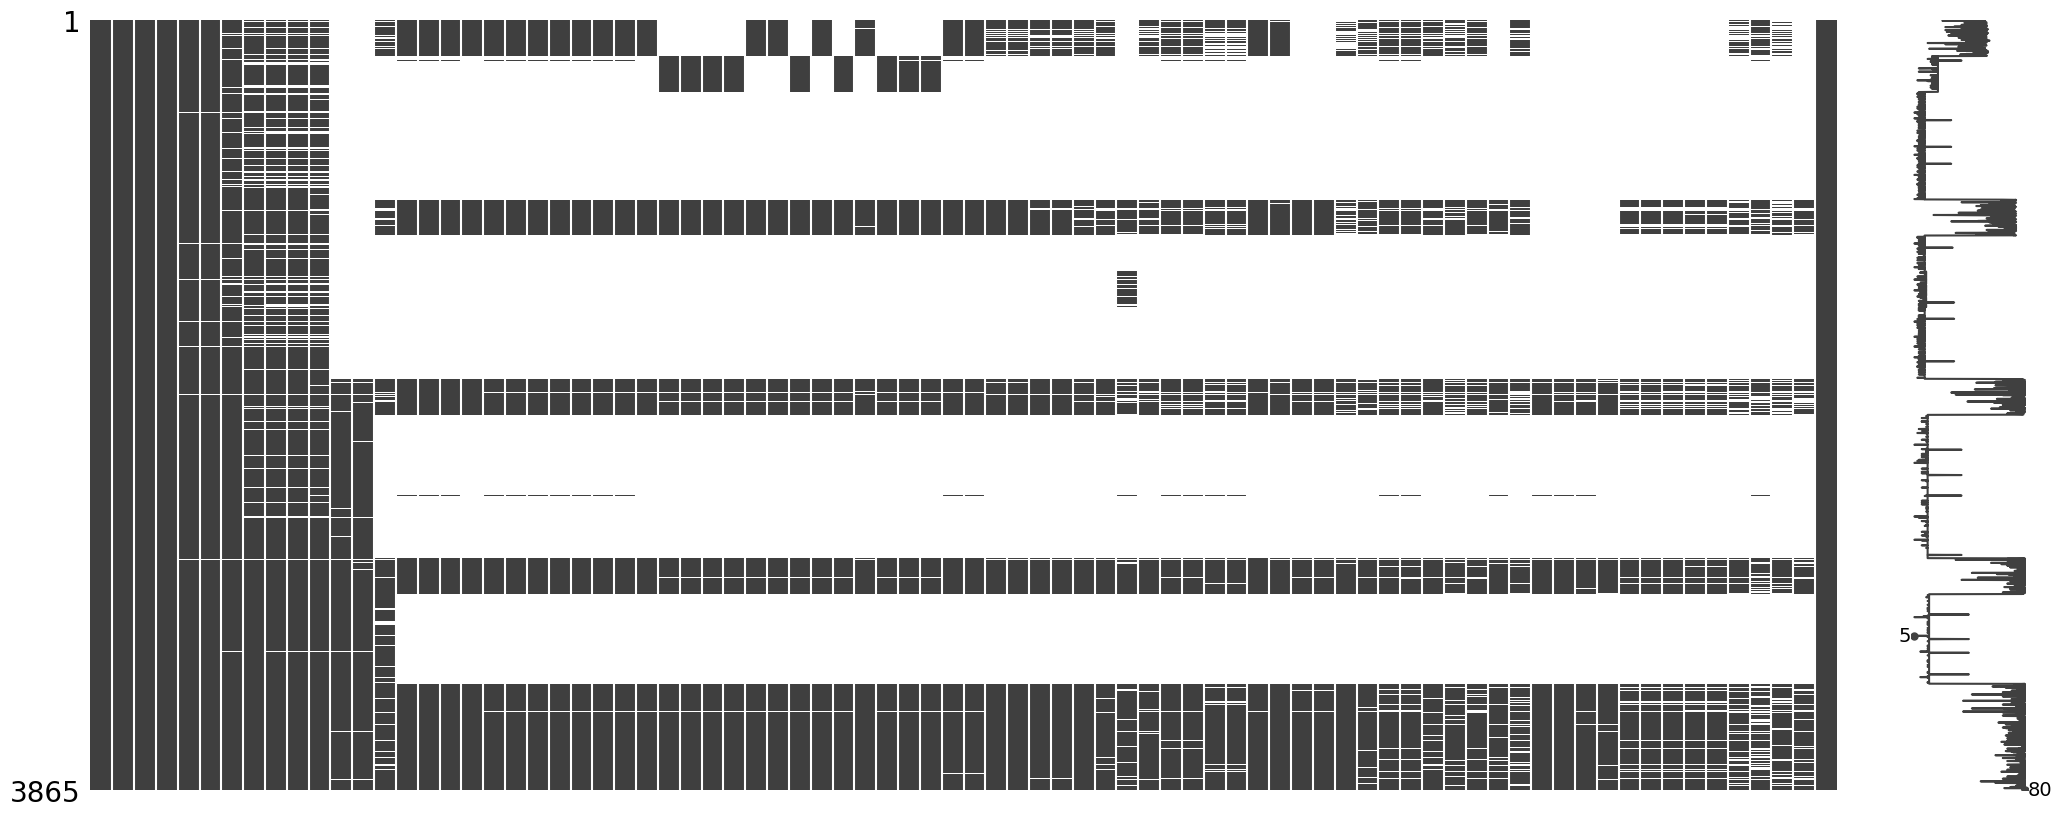

In [66]:
msno.matrix(df)

In [68]:
df.isnull().sum()

galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
Gross income per capita                                                        28
                                                                             ... 
Adjusted net savings                                                         2953
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2924
Private galaxy capital flows (% of GGP)                                      2991
Gender Inequality Index (GII)                                                3021
y                                                                               0
Length: 80, dtype: int64

<H3>datadaki missing deyerler

In [69]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Gender Inequality Index (GII),3021,0.781630
Current health expenditure (% of GGP),2998,0.775679
"Interstellar Data Net users, total (% of population)",2993,0.774386
Private galaxy capital flows (% of GGP),2991,0.773868
Interstellar phone subscriptions (per 100 people),2974,0.769470


#lazimsiz columns cixaririq

In [70]:
for i in df.columns:
    if df[f'{i}'].isnull().sum()>500:
        df.drop(df[[f'{i}']], axis=1, inplace=True)

<H3>train datada mice impute

In [71]:
train_to_mice = df.drop('galaxy', axis=1)
imputed_training = mice(train_to_mice.values)
train_mice = pd.DataFrame(data=imputed_training, columns=train_to_mice.columns.tolist())

In [72]:
train_mice['galaxy'] = df['galaxy']

In [73]:
train_mice.columns

Index(['galactic year', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'y', 'galaxy'],
      dtype='object')

In [74]:
new_list = ['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'y']

In [75]:
train_mice = train_mice[new_list]

In [76]:
train_mice['galaxy'].nunique()

181

In [77]:
test['galaxy'].nunique()

172

<Axes: >

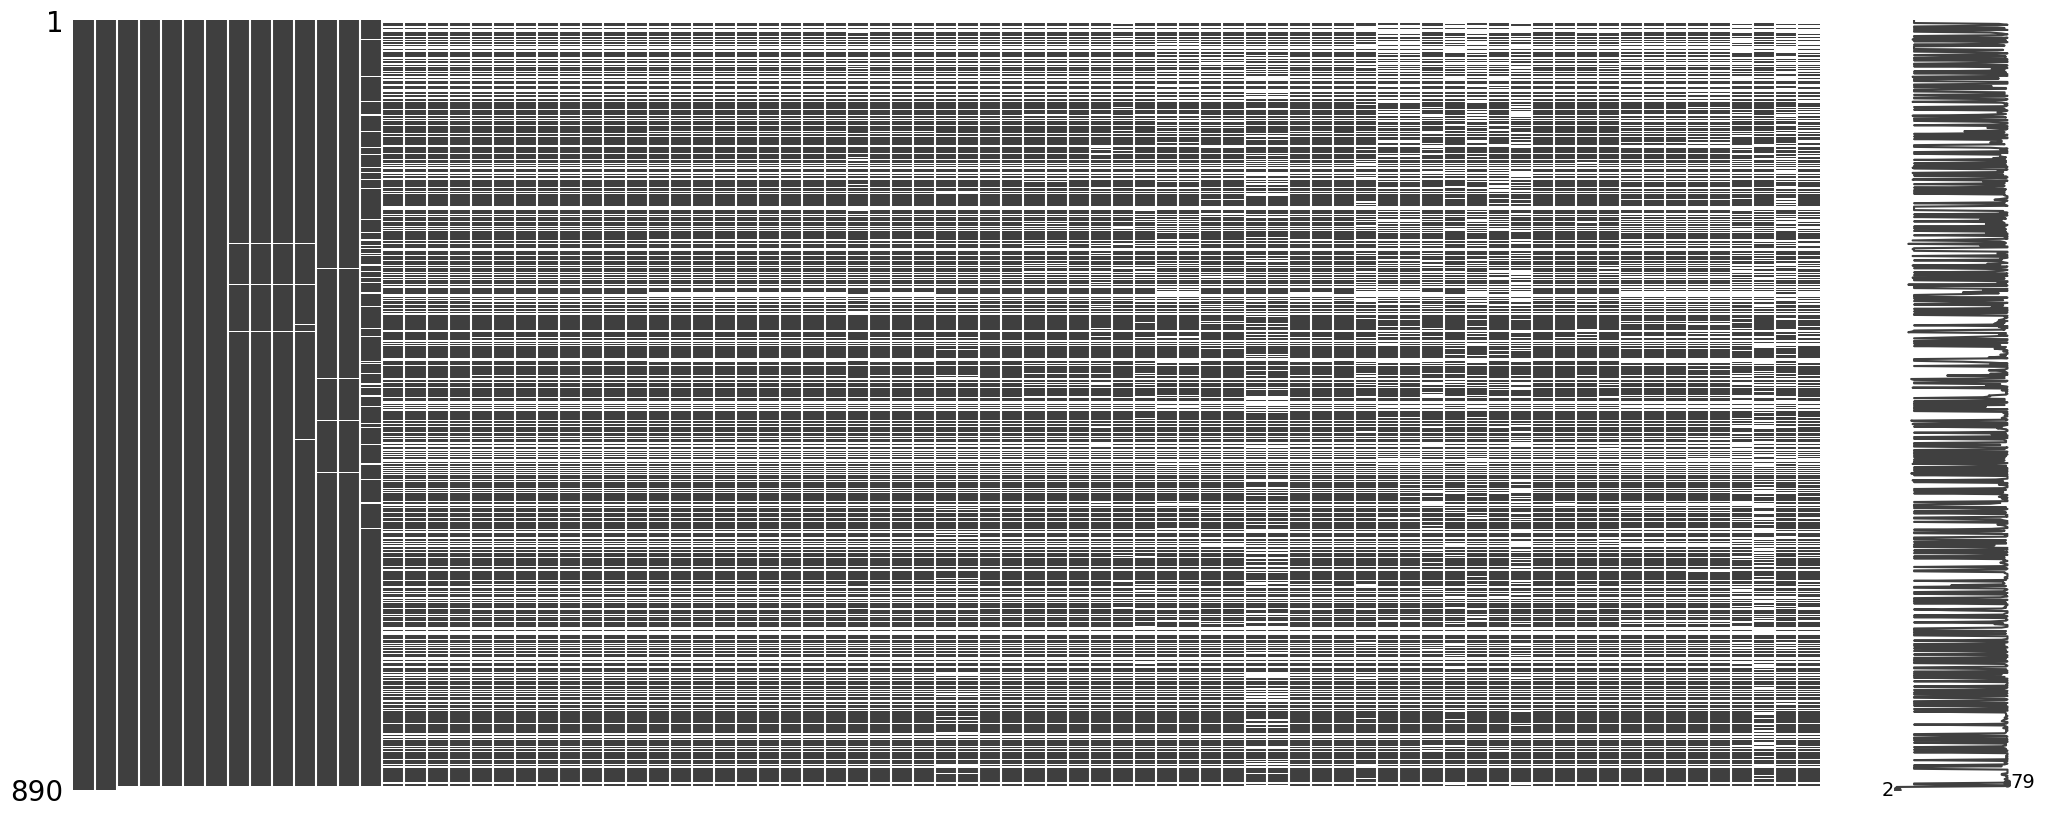

In [79]:
msno.matrix(test)

In [80]:
test.isnull().sum()

galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     5
existence expectancy at birth                                                  5
Gross income per capita                                                        5
                                                                            ... 
Intergalactic Development Index (IDI), male, Rank                            341
Adjusted net savings                                                         371
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    408
Private galaxy capital flows (% of GGP)                                      354
Gender Inequality Index (GII)                                                361
Length: 79, dtype: int64

<H3>test datada lazimsiz columnslari cixaririrq

> Indented block



In [81]:
for i in test.columns:
    if test[f'{i}'].isnull().sum()>500:
        test.drop(test[[f'{i}']], axis=1, inplace=True)

In [82]:
test_list=new_list[0:len(new_list)-1]
test=test[test_list]

<Axes: >

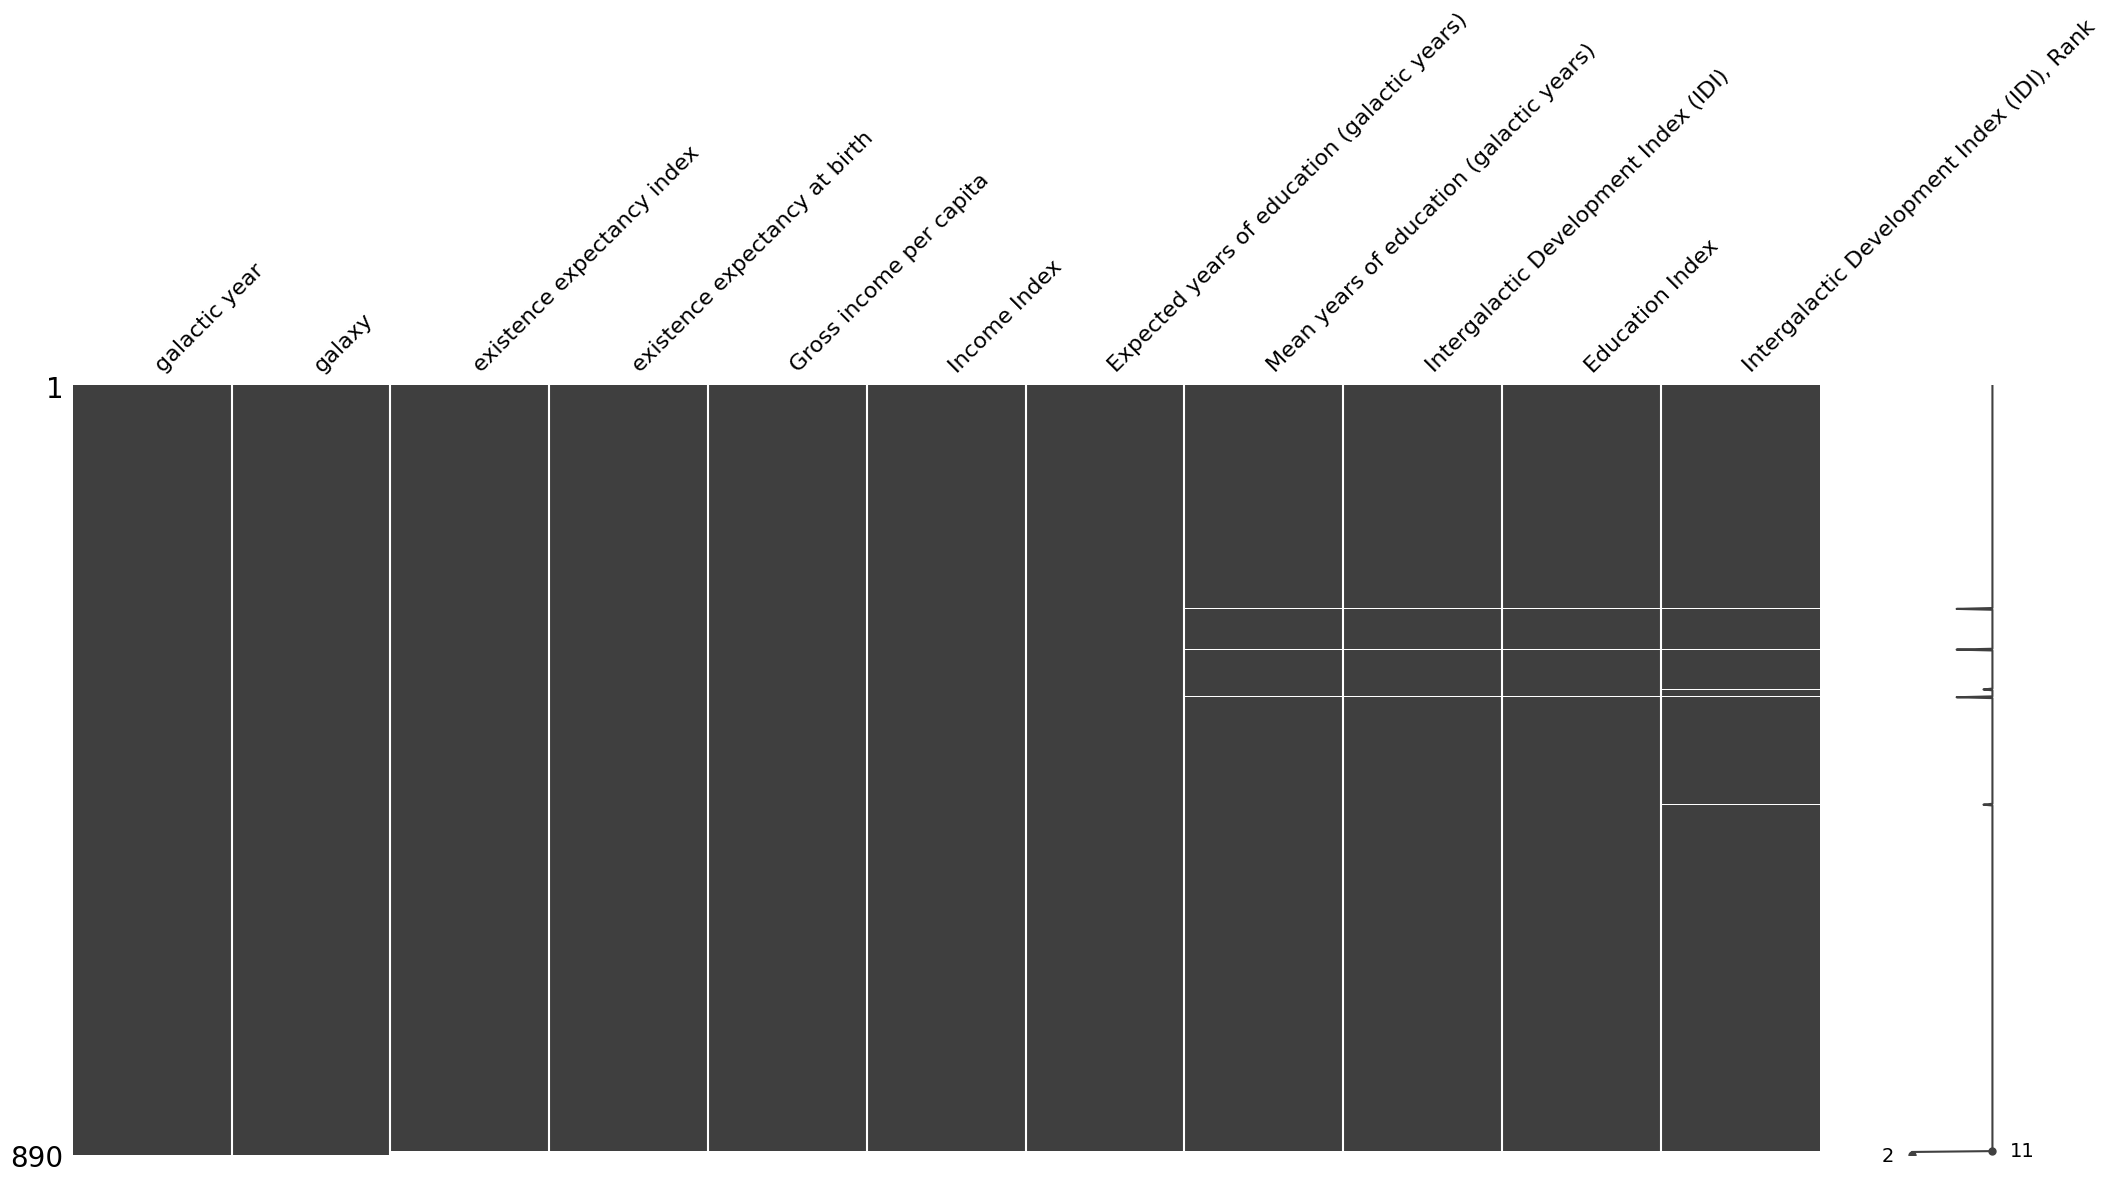

In [83]:
msno.matrix(test)

<Axes: >

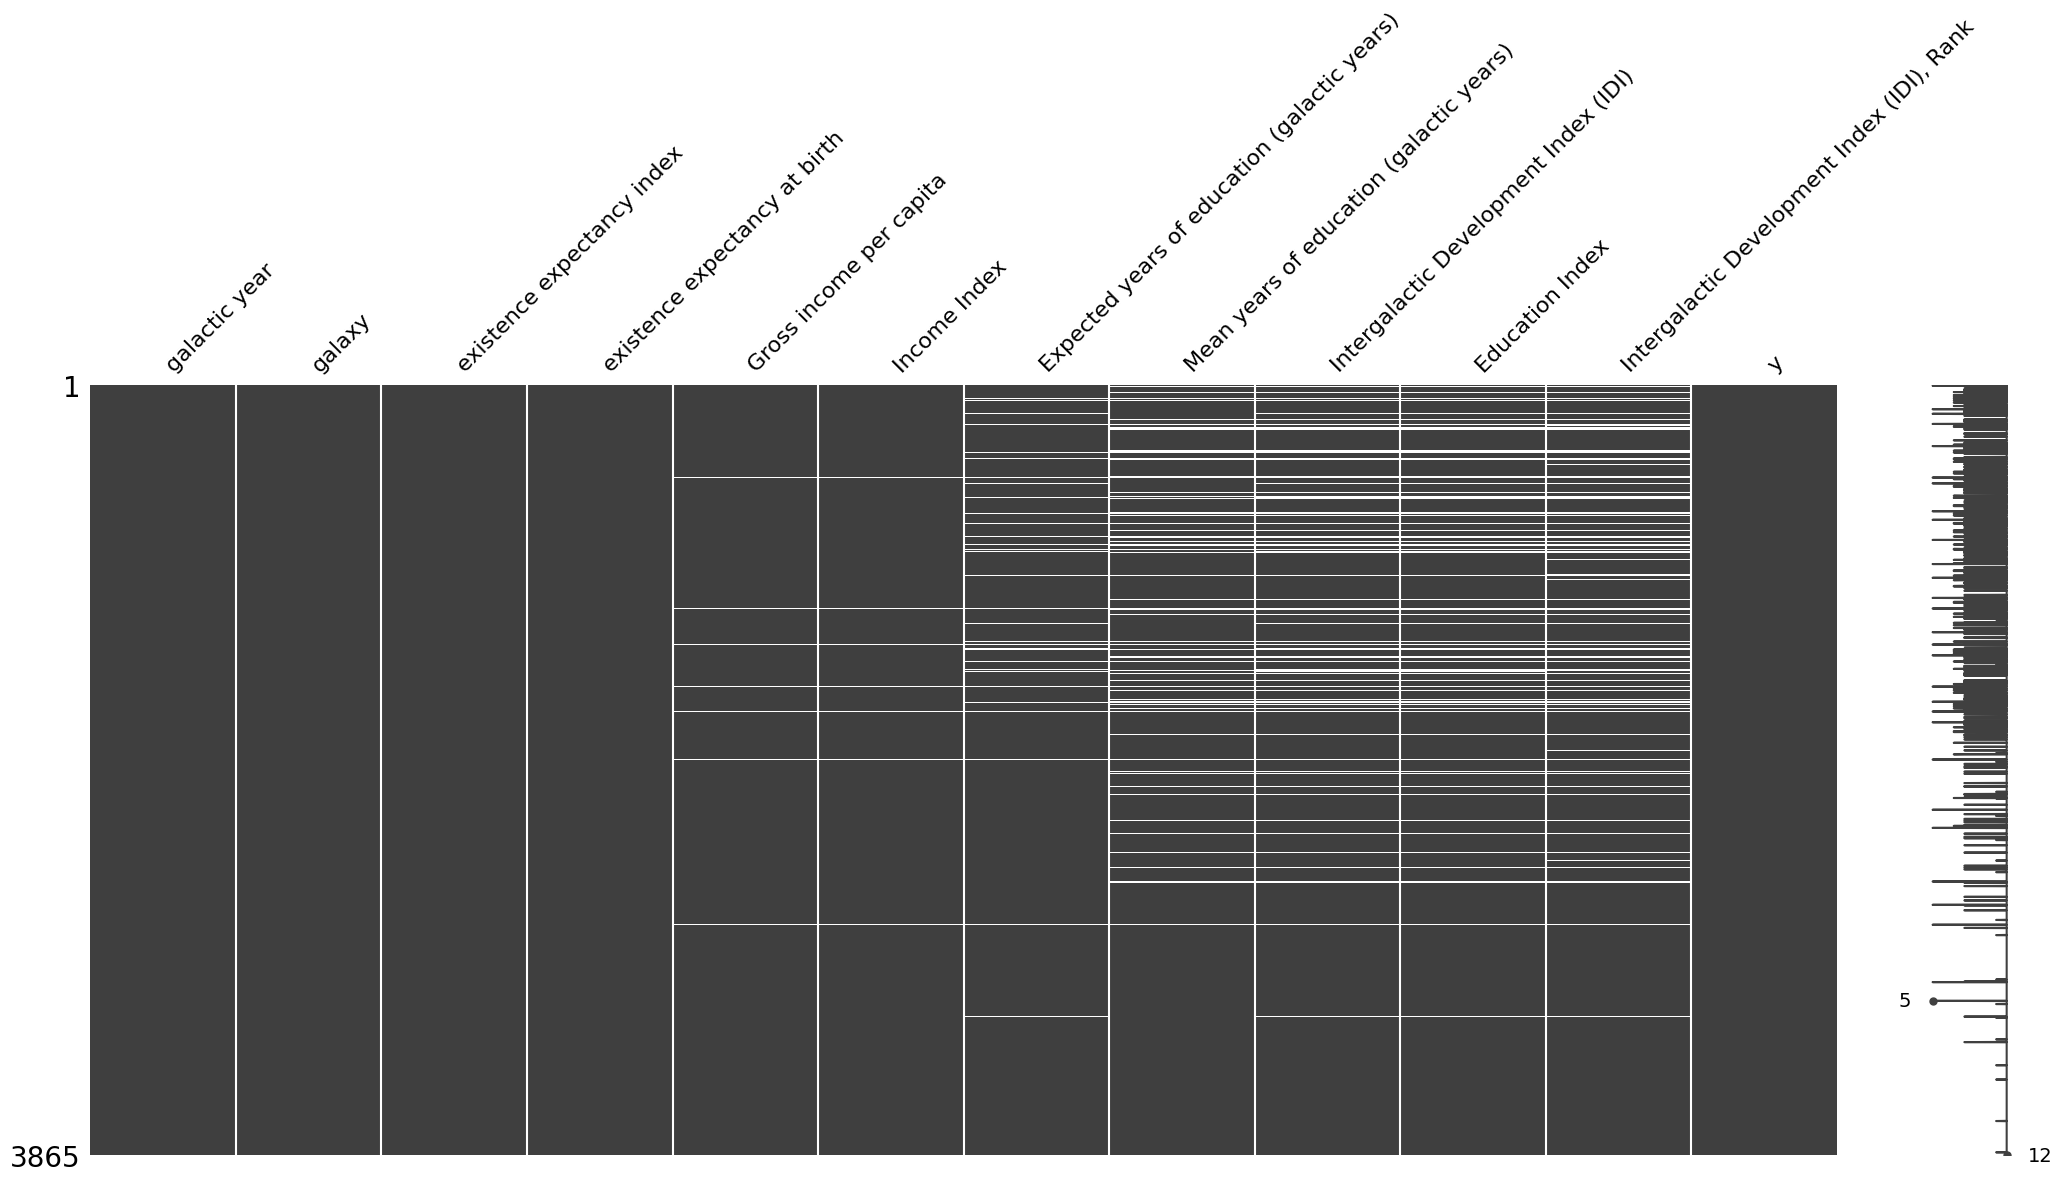

In [84]:
msno.matrix(df)

Text(0.5, 1.0, 'Features Correlating with y column')

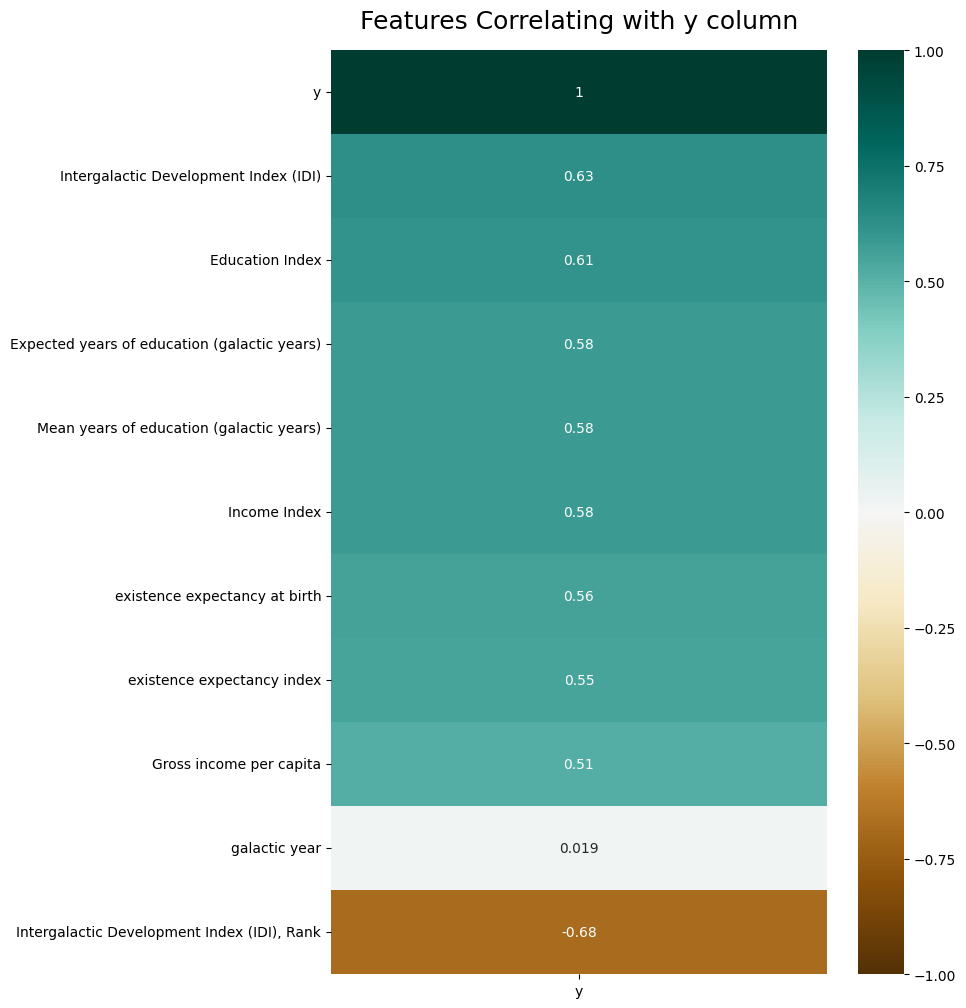

In [85]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with y column', fontdict={'fontsize':18}, pad=16)

<H3>To check same Galaxy in Train and Test Data

In [86]:
same_values=[]
for i in list(test['galaxy']):
    for j in list(train_mice['galaxy']):
        if i==j and i not in same_values:
            same_values.append(i)

<H3>Delete Galaxy that are not in the Test Data

In [28]:
for i in train_mice['galaxy']:
    if i not in same_values:
        train_mice.drop(train_mice[train_mice['galaxy']==i].index, inplace=True)

In [29]:
df=train_mice

In [30]:
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y
0,990025.0,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,6.280815,0.554965,0.447440,173.593767,0.052590
1,990025.0,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,0.059868
2,990025.0,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,0.050449
3,990025.0,UGC 8651 (DDO 181),0.555862,52.333293,17700.887580,0.606562,10.163945,6.927763,0.531136,0.497336,180.611626,0.049394
5,990025.0,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,121.839696,0.052871
...,...,...,...,...,...,...,...,...,...,...,...,...
3860,1015056.0,Columba I,1.029704,82.832063,34310.471408,0.855094,18.578586,10.557143,0.906573,0.862826,144.896214,0.042324
3861,1015056.0,"Leo II Dwarf (Leo B, DDO 93)",0.937869,75.877098,36899.067719,0.929494,16.153857,9.151665,0.865822,0.747577,164.692000,0.036725
3862,1015056.0,Canes Venatici I Dwarf,1.036144,93.540275,37002.977875,1.085245,21.066473,16.661344,0.983835,1.100779,63.726437,0.166271
3863,1015056.0,KKs 3,0.939034,78.274427,28180.459770,0.687655,9.388911,8.908748,0.735694,0.602703,216.805701,0.024187


In [31]:
train_dummies = pd.get_dummies(df['galaxy'])
test_dummies = pd.get_dummies(test['galaxy'])

In [32]:
df.shape

(3664, 12)

In [33]:
df.isnull().sum()

galactic year                                   0
galaxy                                          0
existence expectancy index                      0
existence expectancy at birth                   0
Gross income per capita                         0
Income Index                                    0
Expected years of education (galactic years)    0
Mean years of education (galactic years)        0
Intergalactic Development Index (IDI)           0
Education Index                                 0
Intergalactic Development Index (IDI), Rank     0
y                                               0
dtype: int64

In [34]:
test.isnull().sum()

galactic year                                    0
galaxy                                           0
existence expectancy index                       5
existence expectancy at birth                    5
Gross income per capita                          5
Income Index                                     5
Expected years of education (galactic years)     5
Mean years of education (galactic years)         8
Intergalactic Development Index (IDI)            8
Education Index                                  8
Intergalactic Development Index (IDI), Rank     10
dtype: int64

In [35]:
df.drop('galaxy', axis=1, inplace=True)
X = df.drop(['y'], axis=1)
y = df['y']

In [36]:
test_to_mice = test.drop('galaxy', axis=1)
imputed_training = mice(test_to_mice.values)
test = pd.DataFrame(data=imputed_training, columns=test_to_mice.columns.tolist())

In [37]:
X_joined_dummies = X.join(train_dummies)
df_test_joined_dummies = test.join(test_dummies)

In [38]:
X = X_joined_dummies
df_test_pred = df_test_joined_dummies

<H3>Rename columns with galaxies from alphabetic names to numbers

In [39]:
galaxy_rename_list = train_dummies.columns.tolist()
i = 1
for name in galaxy_rename_list:
    X.rename(columns={name: i}, inplace=True)
    df_test_pred.rename(columns={name: i}, inplace=True)
    i = i + 1

<H1>Modelling

<H4>To find the parameters

In [40]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)



In [41]:

model = XGBRegressor(learning_rate=0.05, subsample=0.3)

In [42]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
preds = model.predict(X_test)

<H3>rmse

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.018733


<H3>Predict 'y' on test case

In [45]:
y_pred_test = model.predict(df_test_pred)

In [46]:
df_test_pred

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,163,164,165,166,167,168,169,170,171,172
0,1007012.0,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,...,0,0,0,0,0,0,0,0,0,0
1,1007012.0,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,...,0,0,0,0,0,0,0,0,0,0
2,1008016.0,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,...,0,0,0,0,0,0,0,0,0,0
3,1007012.0,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,...,0,0,0,0,0,0,0,0,0,0
4,1013042.0,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1016064.0,0.927455,80.370885,31879.104441,0.846417,16.363613,11.162401,0.843048,0.795573,153.576285,...,0,0,0,0,0,0,0,0,0,0
886,1016064.0,0.927455,80.370885,31879.104441,0.846417,16.363613,11.162401,0.843048,0.795573,153.576285,...,0,0,0,0,0,0,0,0,0,0
887,1016064.0,0.927455,80.370885,31879.104441,0.846417,16.363613,11.162401,0.843048,0.795573,153.576285,...,0,0,0,0,0,0,0,0,0,0
888,1016064.0,0.927455,80.370885,31879.104441,0.846417,16.363613,11.162401,0.843048,0.795573,153.576285,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_pred_test

array([0.04696066, 0.04579023, 0.04486241, 0.04618915, 0.03364918,
       0.03650412, 0.03794916, 0.04565712, 0.04603615, 0.04466455,
       0.04486241, 0.03364918, 0.04486241, 0.04486241, 0.03729884,
       0.0435296 , 0.03141349, 0.03819507, 0.04486241, 0.04486241,
       0.0435296 , 0.03130613, 0.04486241, 0.03020774, 0.04642643,
       0.03107201, 0.03650412, 0.04364526, 0.04495847, 0.03898805,
       0.04486241, 0.04579023, 0.04579023, 0.04844358, 0.03020774,
       0.04579023, 0.04579023, 0.0435296 , 0.03130613, 0.03561292,
       0.04486241, 0.03020774, 0.04374471, 0.04486241, 0.04687864,
       0.03794916, 0.04486241, 0.03650412, 0.0435296 , 0.03345035,
       0.04603615, 0.04486241, 0.03364918, 0.04486241, 0.03107201,
       0.04478115, 0.03364918, 0.03082784, 0.03326988, 0.04510832,
       0.03794916, 0.04695503, 0.03794916, 0.04364526, 0.03794916,
       0.04888289, 0.04486241, 0.03020774, 0.04507752, 0.05349784,
       0.04720235, 0.04432431, 0.03130613, 0.03650412, 0.04658

<H3>Check constraints and compute potential

In [48]:
low_eei_idx = df_test_pred[df_test_pred["existence expectancy index"] < 0.7].index
potential = -np.log(y_pred_test + 0.01) + 3
def neg_likely_increase(w):
    return -(w * potential ** 2).sum() / 1000

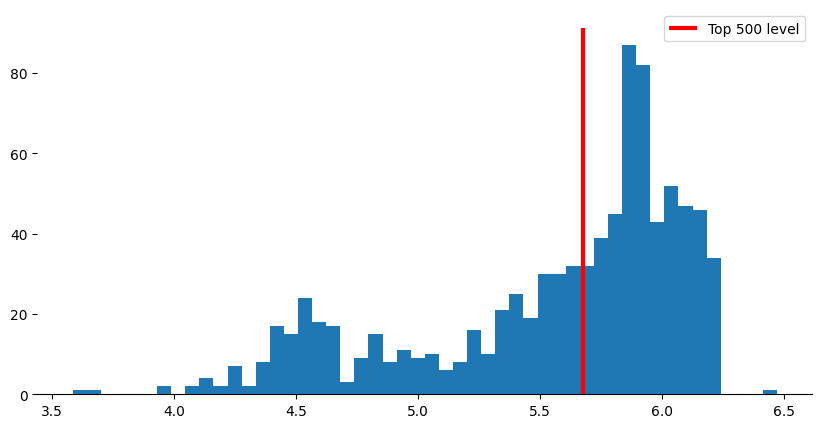

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(potential, bins=50)
ax.vlines(sorted(potential)[-500], ax.get_ylim()[0], ax.get_ylim()[1], label="Top 500 level", color="r", lw=3)
ax.legend()
sns.despine(left=True)
plt.show()

In [50]:
x1 = np.zeros(len(test))
x1[potential.argsort()[::-1][:375]] = 100
x1[potential.argsort()[::-1][375:625]] = [100 - i * (50 / 125) for i in range(1, 126)] + [100 - i  * (50 / 125) for i in range(125, 250)]
print("Total low-EEI galaxies energy:", x1[low_eei_idx].sum())
print("Likely increase:", -neg_likely_increase(x1))

Total low-EEI galaxies energy: 6588.0
Likely increase: 1765.5189108474729


In [51]:
h = 62.5
x2 = np.zeros(len(test))
x2[potential.argsort()[::-1][:250]] = 100
x2[potential.argsort()[::-1][250:500]] = [100 - i / 250 * (100 - h) for i in range(1, 251)]
x2[potential.argsort()[::-1][500:650]] = [1/3 + h - i / 150 * h for i in range(1, 151)]
print("Total low-EEI galaxies energy:", x2[low_eei_idx].sum())
print("Likely increase:", -neg_likely_increase(x2))

Total low-EEI galaxies energy: 6347.700000000001
Likely increase: 1759.5185315100036


<H3>Final submission average

In [52]:
allocation = (x1 + x2) / 2

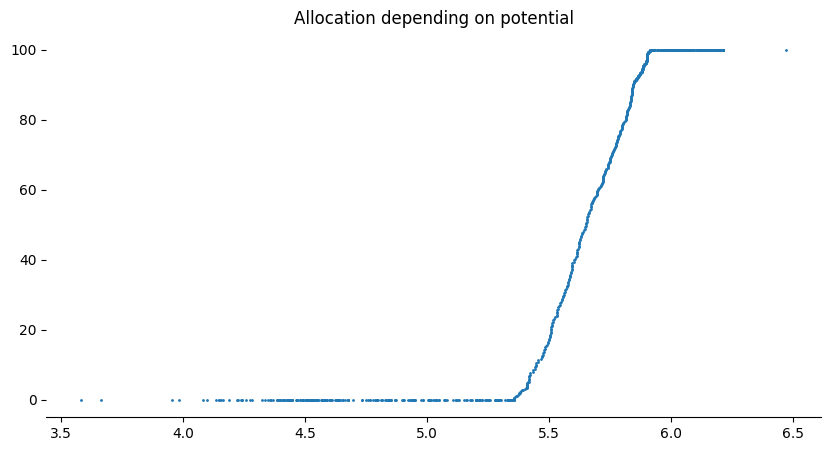

In [53]:
plt.figure(figsize=(10, 5))
plt.title("Allocation depending on potential")
plt.scatter(potential, allocation, s=1)
sns.despine(left=True)
plt.show()

In [54]:
print(f"Total allocated value: {allocation.sum()}")

Total allocated value: 50000.0


In [55]:
result = pd.DataFrame(columns=[ "pred", "opt_pred"])
result["pred"] = y_pred_test
result["opt_pred"] = allocation

In [56]:
result

,pred,opt_pred
0,0.046961,92.500
1,0.045790,95.275
2,0.044862,98.725
3,0.046189,93.775
4,0.033649,100.000
...,...,...
885,0.036706,100.000
886,0.036706,100.000
887,0.036706,100.000
888,0.036706,100.000
